In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive/Technolabs/bank_data.csv', index_col=0)

In [ ]:
data.head()

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
id,,,,,
2030,194,263.540,Level 0 Recovery,19,Male
1150,486,416.090,Level 0 Recovery,25,Female
380,527,429.350,Level 0 Recovery,27,Male
1838,536,296.990,Level 0 Recovery,25,Male
1995,541,346.385,Level 0 Recovery,34,Male


Checking if there's any missing

In [ ]:
missing_values_count = data.isnull().sum()
missing_values_count

expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

Checking if there's any duplicates

In [ ]:
duplicateRows = data[data.duplicated()]
duplicateRows

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
id,,,,,


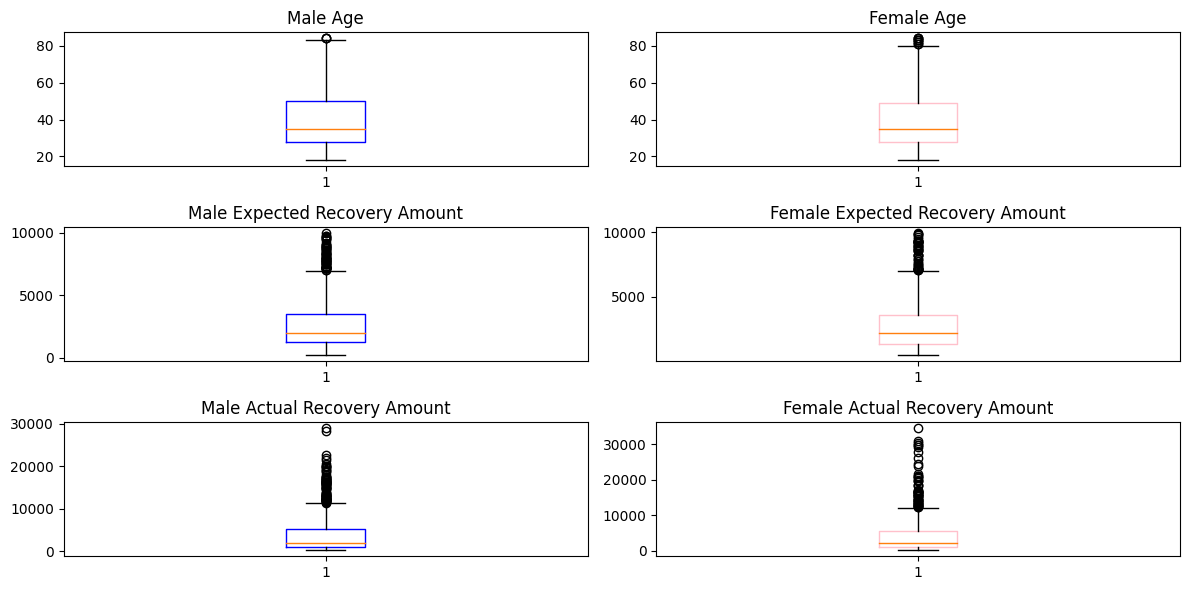

In [ ]:


fig, ax = plt.subplots(3, 2, figsize=(12, 6))

Fig1 = [data['age'][data.sex == 'Male']]
Fig2 = [data['age'][data.sex == 'Female']]

Fig3 = [data['expected_recovery_amount'][data.sex == 'Male']]
Fig4 = [data['expected_recovery_amount'][data.sex == 'Female']]

Fig5 = [data['actual_recovery_amount'][data.sex == 'Male']]
Fig6 = [data['actual_recovery_amount'][data.sex == 'Female']]


boxplot1 = ax[0,0].boxplot(Fig1)
plt.setp(boxplot1['boxes'][0],color='blue')
ax[0,0].set_title('Male Age')

boxplot2 = ax[0,1].boxplot(Fig2)
plt.setp(boxplot2['boxes'][0],color='pink')
ax[0,1].set_title('Female Age')

boxplot3 = ax[1,0].boxplot(Fig3)
plt.setp(boxplot3['boxes'][0],color='blue')
ax[1,0].set_title('Male Expected Recovery Amount')

boxplot4 = ax[1,1].boxplot(Fig4)
plt.setp(boxplot4['boxes'][0],color='pink')
ax[1,1].set_title('Female Expected Recovery Amount')

boxplot5 = ax[2,0].boxplot(Fig5)
plt.setp(boxplot5['boxes'][0],color='blue')
ax[2,0].set_title('Male Actual Recovery Amount')

boxplot6 = ax[2,1].boxplot(Fig6)
plt.setp(boxplot6['boxes'][0],color='pink')
ax[2,1].set_title('Female Actual Recovery Amount')

plt.tight_layout()
plt.show()


**Age vs Expexted recovery amount**

Text(0, 0.5, 'Expected Recovery Amount')

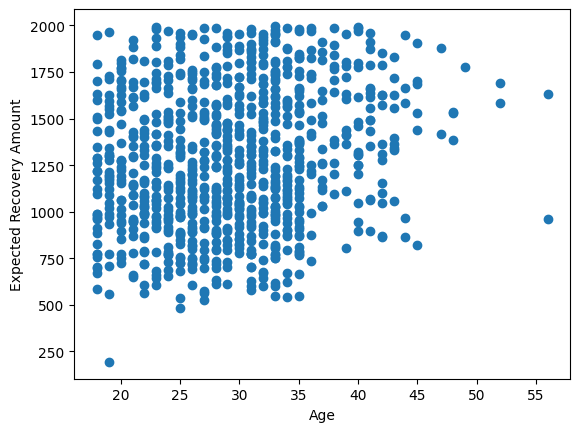

In [ ]:
filtered_data = data[data['expected_recovery_amount'] < 2000]

plt.scatter(filtered_data['age'],filtered_data['expected_recovery_amount'])
plt.xlabel('Age')
plt.ylabel('Expected Recovery Amount')

Male Vs Female @ Expected recovery amount below 1000

Text(0.5, 1.0, 'Female')

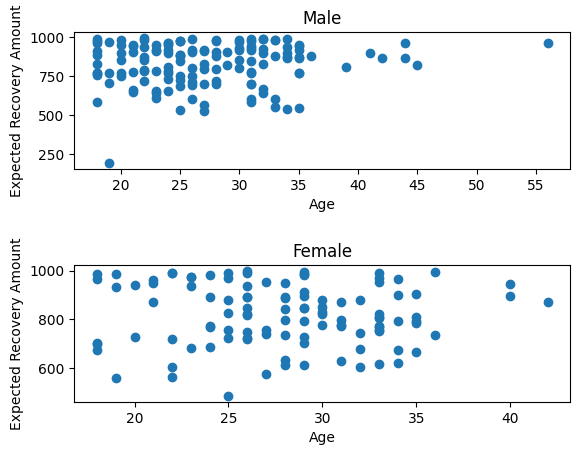

In [ ]:
plt.subplot(2, 1, 1)
data_male_below = data[(data['sex'] == 'Male') & (data['expected_recovery_amount'] < 1000)]
plt.scatter(data_male_below['age'],data_male_below['expected_recovery_amount'])
plt.xlabel('Age')
plt.ylabel('Expected Recovery Amount')
plt.title('Male')

plt.subplots_adjust(hspace=0.7)
plt.subplot(2, 1, 2)
data_female_below = data[(data['sex'] == 'Female') & (data['expected_recovery_amount'] < 1000)]
plt.scatter(data_female_below['age'],data_female_below['expected_recovery_amount'])
plt.xlabel('Age')
plt.ylabel('Expected Recovery Amount')
plt.title('Female')

Male Vs Female @ Expected recovery amount above 1000

Text(0.5, 1.0, 'Female')

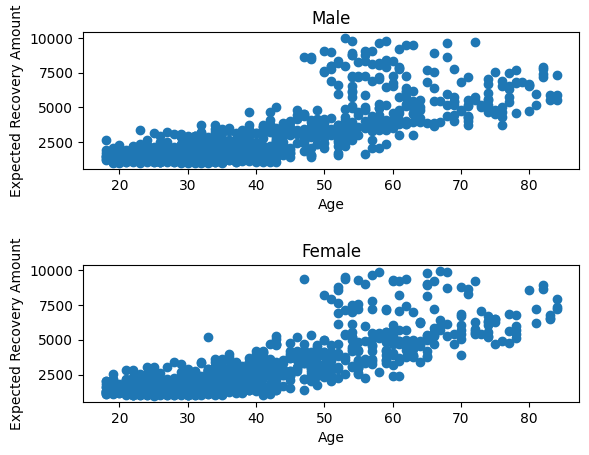

In [ ]:
plt.subplot(2, 1, 1)
data_male_above = data[(data['sex'] == 'Male') & (data['expected_recovery_amount'] > 1000)]
plt.scatter(data_male_above['age'],data_male_above['expected_recovery_amount'])
plt.xlabel('Age')
plt.ylabel('Expected Recovery Amount')
plt.title('Male')

plt.subplots_adjust(hspace=0.7)
plt.subplot(2, 1, 2)
data_female_above = data[(data['sex'] == 'Female') & (data['expected_recovery_amount'] > 1000)]
plt.scatter(data_female_above['age'],data_female_above['expected_recovery_amount'])
plt.xlabel('Age')
plt.ylabel('Expected Recovery Amount')
plt.title('Female')

Male @ the expected recovery amount between 900 and 1100

Text(0, 0.5, 'Expected Recovery Amount')

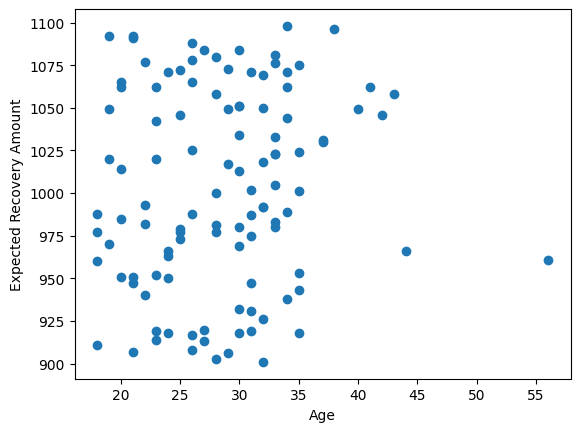

In [ ]:
data_male = data[(data['sex'] == 'Male') & (data['expected_recovery_amount'] < 1100) & (data['expected_recovery_amount'] > 900) ]
plt.scatter(data_male['age'],data_male['expected_recovery_amount'])
plt.xlabel('Age')
plt.ylabel('Expected Recovery Amount')


Expected Recovery Amount vs Actual Recovery Amount

Text(0, 0.5, 'Expected Recovery Amount')

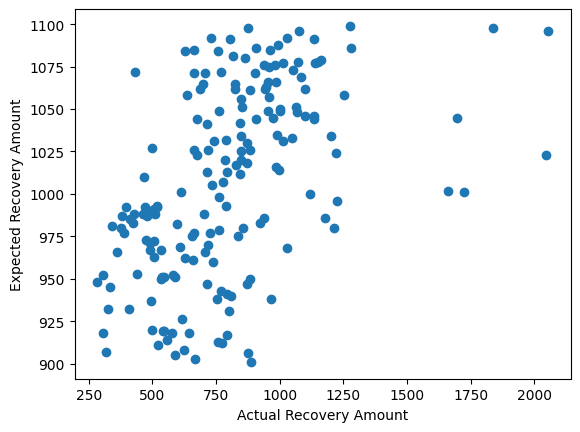

In [ ]:
data_filtered = data[(data['expected_recovery_amount'] < 1100) & (data['expected_recovery_amount'] > 900)]
plt.scatter(data_filtered['actual_recovery_amount'],data_filtered['expected_recovery_amount'])
plt.xlabel('Actual Recovery Amount')
plt.ylabel('Expected Recovery Amount')

In [ ]:
count = len(data_filtered)
Average = len(data_filtered[data_filtered['sex']=='Male'])/count *100
average_rounded = round(Average, 2)
print('Male Precentage at The threshold between 900 and 1100 ' + str(average_rounded) + '%' )

Male Precentage at The threshold between 900 and 1100 61.11%


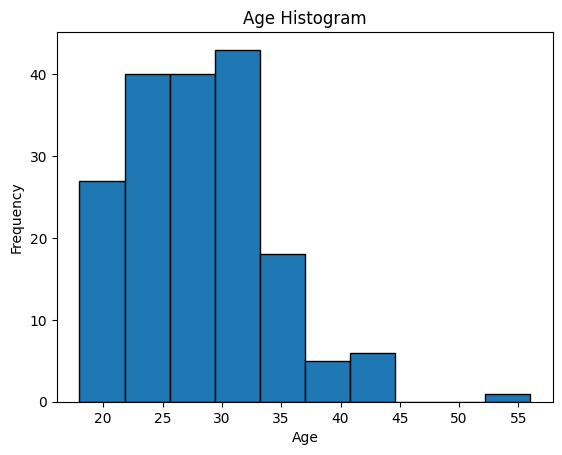

In [ ]:
ages = data_filtered['age']

plt.hist(ages, bins=10, edgecolor='black')
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-15-c628e01b825f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,expected_recovery_amount,actual_recovery_amount,age
expected_recovery_amount,1.000000,0.903727,0.794451
actual_recovery_amount,0.903727,1.000000,0.716007
age,0.794451,0.716007,1.000000


In [ ]:
import scipy.stats as stats

data1 =  data[(data['actual_recovery_amount'] < 1000) ]

sample1 =  data1[(data1['expected_recovery_amount'] < 1100) & (data1['expected_recovery_amount'] > 900)]
sample2 =   data1[(data1['expected_recovery_amount'] < 1050) & (data1['expected_recovery_amount'] > 950)]

statistic, p_value = stats.kruskal(sample1, sample2)

alpha = 0.05

print("Kruskal-Wallis Test:")
print("Test statistic:", statistic)
print("p-value:", p_value)

Kruskal-Wallis Test:
Test statistic: [0.00734908 1.70952836 0.42352647 0.38779882 0.49678879]
p-value: [0.9316836  0.19104657 0.51518263 0.53345871 0.48091451]


In [ ]:
import statsmodels.api as sm
import seaborn as sns



y = data['expected_recovery_amount']
X = data['actual_recovery_amount']


model1 = sm.OLS(y, X).fit()

print("Model Summary - Training Data:")
print(model1.summary())


Model Summary - Training Data:
                                    OLS Regression Results                                   
Dep. Variable:     expected_recovery_amount   R-squared (uncentered):                   0.870
Model:                                  OLS   Adj. R-squared (uncentered):              0.870
Method:                       Least Squares   F-statistic:                          1.264e+04
Date:                      Mon, 21 Aug 2023   Prob (F-statistic):                        0.00
Time:                              00:41:24   Log-Likelihood:                         -16062.
No. Observations:                      1882   AIC:                                  3.213e+04
Df Residuals:                          1881   BIC:                                  3.213e+04
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
                             

In [ ]:

data['above_threshold'] = (data['expected_recovery_amount'] > 1000).astype(int)
data['below_threshold'] = (data['expected_recovery_amount'] <= 1000).astype(int)

X = data[['expected_recovery_amount', 'above_threshold', 'below_threshold']]
y = data['actual_recovery_amount']

model1 = sm.OLS(y, X).fit()

print("Model Summary - Training Data:")
print(model1.summary())


Model Summary - Training Data:
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4242.
Date:                    Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                            00:42:03   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

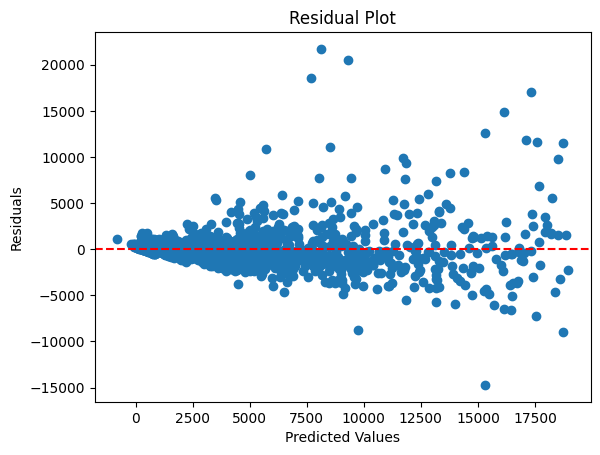

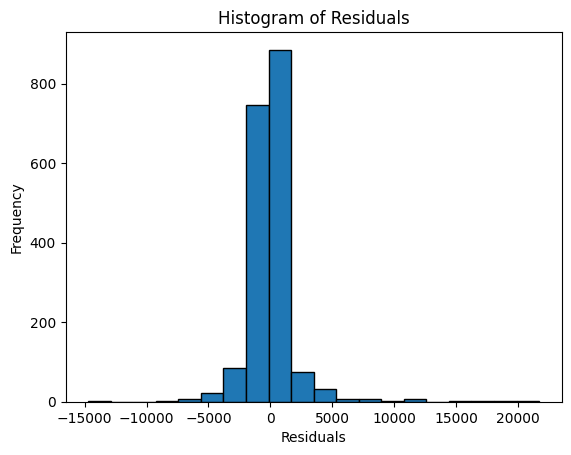

In [ ]:
# Calculate residuals
residuals = y - model1.predict(X)

# Create a residual plot
plt.scatter(model1.predict(X), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


In [ ]:
Below = 950
Above = 1050
data_new_window = data[(data['expected_recovery_amount'] >= Below) & (data['expected_recovery_amount'] <= Above)]
X_new = data_new_window[['expected_recovery_amount', 'above_threshold', 'below_threshold']]
y_new = data_new_window['actual_recovery_amount']

# Add a constant term to the independent variable matrix
X_new = sm.add_constant(X_new)

# Fit the regression model
model_new = sm.OLS(y_new, X_new).fit()

# Print the model summary
print(model_new.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.270
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     17.90
Date:                    Mon, 21 Aug 2023   Prob (F-statistic):           2.42e-07
Time:                            00:30:18   Log-Likelihood:                -700.65
No. Observations:                     100   AIC:                             1407.
Df Residuals:                          97   BIC:                             1415.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------